# Individual Assignment 2 (Monica Jang - 261266437)

In [10]:
!pip install dowhy
!pip install causalml

  Using cached numpy-2.4.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached numpy-2.3.5-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.3.5-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.3.5 which is incompatible.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
streamlit 1.30.0 requires pillow<11,>=7.1.0, but you have pillow 12.1.0 which is incompatible.
tslearn 0.6.4 requires numba<0.62,>=0.58.1, but you have numba 0.62.1 which is incompatible.
tslearn 0.6.4 requires numpy<2.3,>=1.24.3, but you have numpy 2.3.5 whi


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip uninstall -y numpy
!pip install "numpy<2"

Found existing installation: numpy 2.3.5
Uninstalling numpy-2.3.5:
  Successfully uninstalled numpy-2.3.5
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 25.0 which is incompatible.
streamlit 1.30.0 requires pillow<11,>=7.1.0, but you have pillow 12.1.0 which is incompatible.
dowhy 0.14 requires numpy>2.0, but you have numpy 1.26.4 which is incompatible.
tslearn 0.6.4 requires numba<0.62,>=0.58.1, but you have numba 0.62.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
cvxpy 1.8.1 requires numpy>=2.0.0, but you have numpy 1.26.4 which is 

## 1. Data Load and Preparation

### 1.1 Data Load

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("student_data.csv")
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [13]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print()

Column: id
Unique Values: [     0      1      2 ... 629997 629998 629999]

Column: age
Unique Values: [21 18 20 19 23 24 22 17]

Column: gender
Unique Values: ['female' 'other' 'male']

Column: course
Unique Values: ['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']

Column: study_hours
Unique Values: [7.91   4.95   4.68   2.     7.65   5.04   4.28   4.19   1.06   3.44
 7.24   6.85   7.4    6.99   2.91   7.47   4.56   3.8    0.08   4.39
 6.23   0.12   6.75   4.01   7.59   7.66   3.73   0.49   5.08   2.67
 3.99   0.4    2.64   5.14   7.19   3.78   3.09   5.11   3.38   4.33
 7.75   6.2    0.55   2.36   3.11   6.9    4.55   7.04   4.47   2.19
 5.83   6.66   0.44   4.66   6.76   2.05   0.39   0.6    0.93   4.78
 1.54   1.65   1.29   5.71   1.34   4.12   3.2    4.23   3.85   4.
 3.64   4.88   4.06   0.96   3.07   5.37   1.59   7.44   6.88   4.53
 6.53   4.77   1.81   6.05   4.4    5.64   0.36   7.69   5.15   5.81
 7.03   5.93   1.86   2.33   2.69   4.87   1.27   5.76   7.45   6.38
 0.28  

Column: exam_difficulty
Unique Values: ['easy' 'moderate' 'hard']

Column: exam_score
Unique Values: [ 78.3    46.7    99.     63.9   100.     70.1    63.4    76.8    58.2
  85.9    74.5    93.5    51.6    58.6    67.4    32.2    94.3    77.4
  34.5    92.4    80.8    49.5    76.2    91.2    62.3    31.5    69.1
  57.3    42.9    53.1    67.2    74.8    49.7    64.2    69.8    59.9
  46.5    95.4    74.6    57.7    58.     70.     86.5    86.3    73.8
  69.2    22.7    75.5    36.9    66.     70.9    51.4    25.9    44.2
  29.1    46.     98.2    37.3    41.7    31.9    89.9    41.5    69.5
  57.2    66.7    76.5    64.3    71.9    87.7    44.3    73.7    38.4
  92.3    52.8    64.7    57.5    73.6    92.1    68.     84.8    93.2
  44.     79.1    41.3    70.6    74.4    85.8    21.1    60.7    65.9
  76.     39.9    81.9    76.4    29.6    46.8    54.2    62.9    63.7
  68.4    19.599  28.1    55.7    58.1    60.6    81.3    37.7    62.4
  83.     53.5    42.7    61.5    77.5    77.  

### 1.2 Data Preparation
- id column should be removed prior to analysis because it is just a non-informative identifier and can introduce unnecessary noise.
- As noted in the previous assignment, the gender column contains values: female, male, and other. Since the "Other" category may be challenging to interpret in a business context, this column can be removed.
- Despite reviewing the metadata, the facility_rating column is not clearly defined. Therefore, it is advisable to drop this column as well.

In [14]:
df = df.drop(['id', 'gender', 'facility_rating'], axis=1)
df

,age,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,exam_difficulty,exam_score
0,21,b.sc,7.91,98.8,no,4.9,average,online videos,easy,78.300
1,18,diploma,4.95,94.8,yes,4.7,poor,self-study,moderate,46.700
2,20,b.sc,4.68,92.6,yes,5.8,poor,coaching,moderate,99.000
3,19,b.sc,2.00,49.5,yes,8.3,average,group study,moderate,63.900
4,23,bca,7.65,86.9,yes,9.6,good,self-study,easy,100.000
...,...,...,...,...,...,...,...,...,...,...
629995,18,b.tech,4.86,70.7,yes,4.1,good,mixed,moderate,69.500
629996,21,ba,7.08,54.4,yes,4.5,average,mixed,moderate,78.900
629997,24,bca,0.64,44.2,yes,4.3,poor,online videos,moderate,19.599
629998,20,b.com,1.54,75.1,yes,8.2,average,group study,moderate,59.100


## 2. Preparation for Causal Model Creation

### 2.1 Define the treatment column

**Hypothesis**
- Students who utilize external learning methods (Coaching, Online Videos) will achieve higher exam scores compared to those who rely on self-study.

**Group setting**
- Treatment Group: Students using 'Coaching' or 'Online Videos'. These represent active external interventions or structured resources.
- Control Group: Students engaged in 'Self-study'. This represents the baseline group without external structured assistance.

**Data Filtering (exclude observations categorized as 'Mixed' or 'Group Study')**
- Eliminating Confounding Effects: The 'Mixed' category, by definition, can combine self-study with other methods. Including it would blur the boundary between the treatment and control groups, making it difficult to isolate the pure effect of external coaching or videos.
- Enhancing Contrast: By focusing on the most contrasting methods (Self-study vs. Structured External Help), I can more clearly identify the Average Treatment Effect and ensure the results are statistically significant and interpretable.

In [7]:
# Filtering for a cleaner comparison
target_methods = ['self-study', 'coaching', 'online videos']
df_filtered = df[df['study_method'].isin(target_methods)].copy()
df_filtered['treatment'] = df_filtered['study_method'].apply(lambda x: 1 if x in ['coaching', 'online videos'] else 0)


print(f"Original data size: {len(df)}")
print(f"Filtered data size: {len(df_filtered)}")

Original data size: 630000
Filtered data size: 383905


### 2.2 Define the outcome, common causes,  effect_modifiers 

**Outcome**
- The final exam_score we aim to analyze.

**Common Causes**
- Variables that influence both the choice of study method and exam score (e.g., sleep hours, attendance).

**Effect Modifiers**
- Variables that might change how effective the treatment is for different students (e.g., the specific course).

In [8]:
# Treatment column
treatment_name = ['treatment']

# Outcome (Target variable)
outcome_name = 'exam_score'

# Common causes
common_causes = [
    'age', 
    'study_hours', 
    'class_attendance', 
    'internet_access',
    'sleep_hours',
    'sleep_quality'
]

# Effect modifiers
effect_modifiers = ['course', 'exam_difficulty']


print(f"Outcome: {outcome_name}")
print(f"Treatment: {treatment_name}")
print(f"Common Causes: {common_causes}")
print(f"Effect Modifiers: {effect_modifiers}")

Outcome: exam_score
Treatment: ['treatment']
Common Causes: ['age', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality']
Effect Modifiers: ['course', 'exam_difficulty']


### 2.3 Data Pre-processing

In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


# Define features for preprocessing pipelines 
onehot_cols = ['course', 'internet_access']
ordinal_cols = ['sleep_quality', 'exam_difficulty']
num_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_cols),
    ('ordinal', OrdinalEncoder(categories=[
        ['poor', 'average', 'good'],
        ['easy', 'moderate', 'hard']
    ]), ordinal_cols),
    ('num', MinMaxScaler(feature_range=(-1, 1)), num_cols)
])


# Convert data
X = preprocessor.fit_transform(df_filtered)
feature_names = preprocessor.get_feature_names_out().tolist()

T = df_filtered['treatment'].values  
y = df_filtered['exam_score'].values


# Create numeric dataframe for DoWhy
df_numeric = pd.DataFrame(X, columns=feature_names)
df_numeric['treatment'] = T      
df_numeric['exam_score'] = y 

## 3. Causal Model Creation

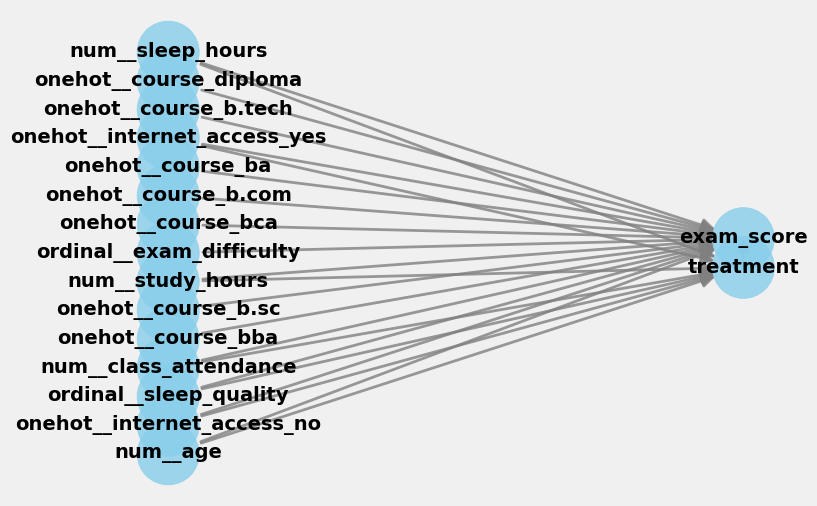

In [20]:
from dowhy import CausalModel

# Common causes & Effect modifiers mapping from processed data
cc_processed = [n for n in feature_names if any(b in n for b in common_causes)]
em_processed = [n for n in feature_names if any(b in n for b in effect_modifiers)]

model = CausalModel(
    data=df_numeric,
    treatment='treatment',
    outcome='exam_score',
    common_causes=cc_processed,
    effect_modifiers=em_processed
)

model.view_model()

## 4. Identify the Causal Effect

In [43]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[exam_score|num_access_no,ordinal_quality,num_attendance,num_hou ↪
d[treatment]                                                                   ↪

↪                                                                              ↪
↪ rs,onehot_access_yes,num_hours__age,onehot__internet__sleep__class__study__i ↪
↪                                                                              ↪

↪                 
↪ nternet__sleep])
↪                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→exam_score then P(exam_score|treatment,num__age,onehot__internet_access_no,ordinal__sleep_quality,num__class_attendance,num__study_hours,onehot__internet_access_yes,num__sleep_hours,U) = P(exam_score|treatment,num__age,onehot__internet_access_no,ordinal__sleep_quality,num__class_at

## 5. Estimate Causal Effect

### 5.1 Experiment with XGBTRegressor (Non-linear Boosting Model)

In [22]:
from causalml.inference.meta import XGBTRegressor

xgb_learner = XGBTRegressor()
ate_xgb = xgb_learner.estimate_ate(X=X, treatment=T, y=y)
print(f"XGBTRegressor Estimated ATE: {ate_xgb[0][0]:.4f}")

XGBTRegressor Estimated ATE: 5.0396


### 5.2 Experiment with LRSRegressor (Linear Model)

In [24]:
from causalml.inference.meta import LRSRegressor

lrs_learner = LRSRegressor()
ate_lrs = lrs_learner.estimate_ate(X=X, treatment=T, y=y)
print(f"LRSRegressor Estimated ATE: {ate_lrs[0][0]:.4f}")

LRSRegressor Estimated ATE: 5.1475


### 5.3 Results Interpretation

The causal analysis demonstrates a clear positive impact of external learning support (such as coaching and online videos) on student exam performance. By utilizing XGBTRegressor and LRSRegressor, I estimated the Average Treatment Effect (ATE) to be approximately 5.04 to 5.15 points respectively.

## 6. Plot feature importance

### 6.1 XGBTRegressor

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

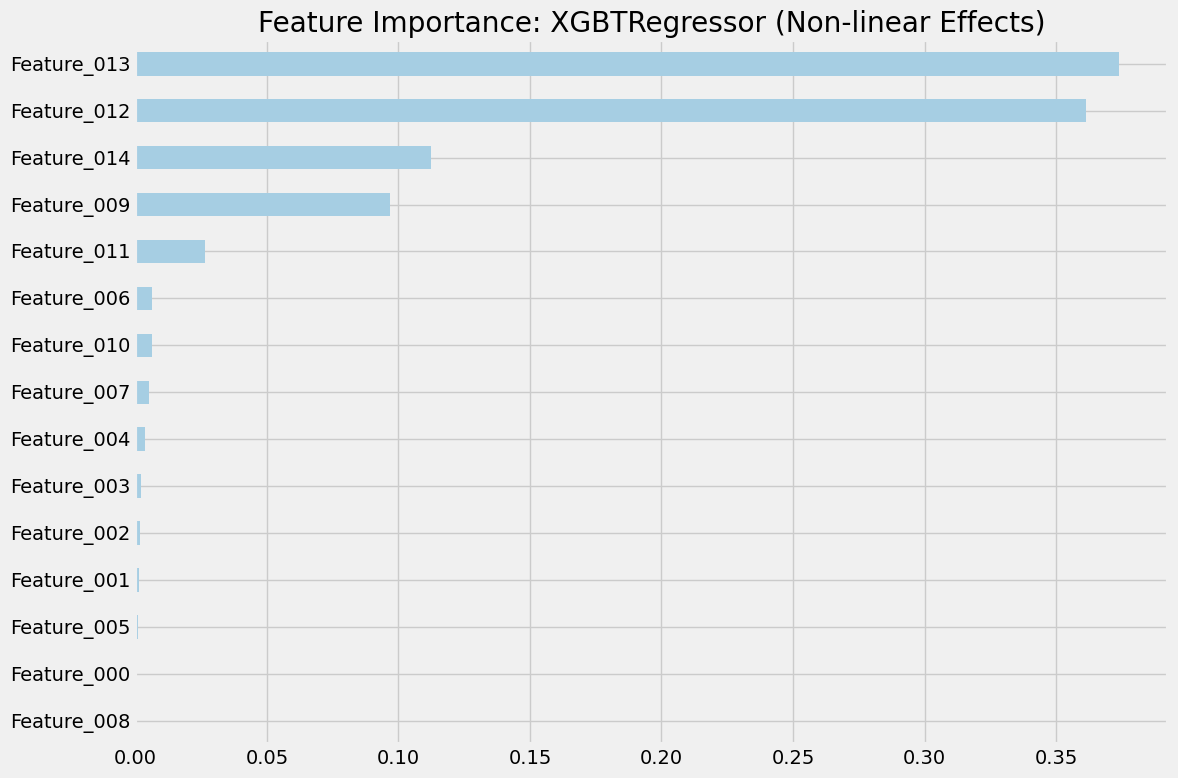

In [44]:
te_xgb = xgb_learner.fit_predict(X=X, treatment=T, y=y)

xgb_learner.plot_importance(X=X_df, tau=te_xgb, method='auto')
plt.title("Feature Importance: XGBTRegressor (Non-linear Effects)")
plt.tight_layout()
plt.show()

### 6.2 LRSRegressor

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

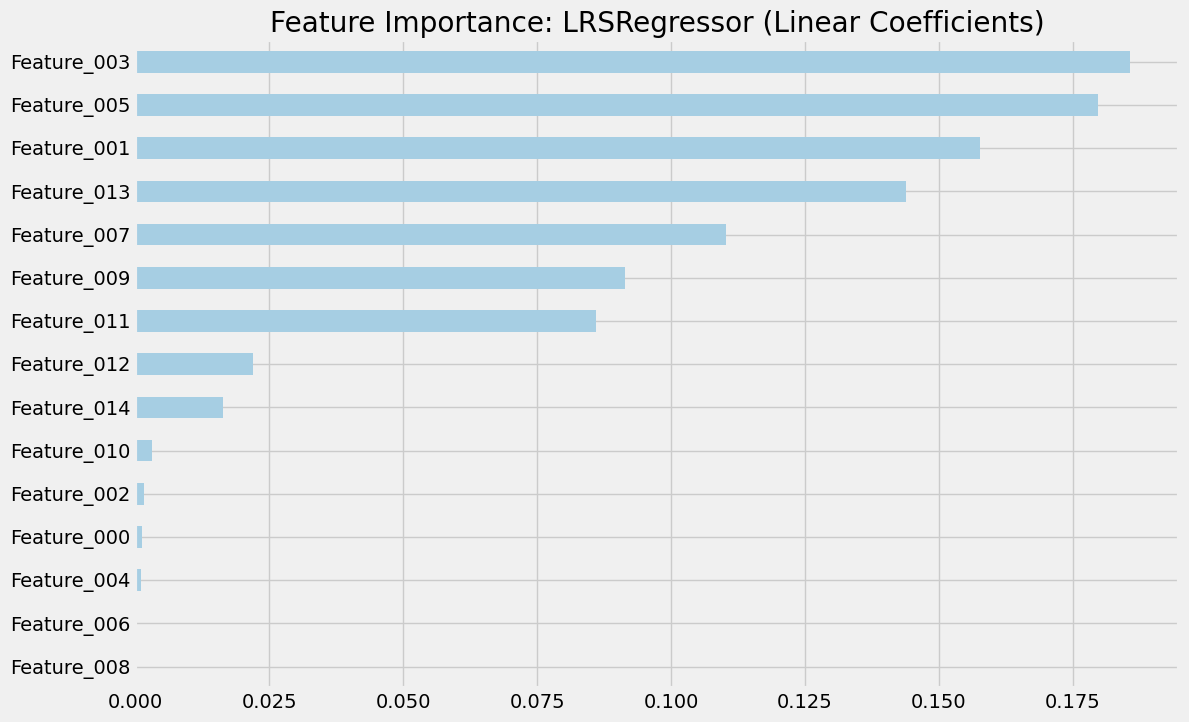

In [25]:
te_lrs = lrs_learner.fit_predict(X=X, treatment=T, y=y)
lrs_learner.plot_importance(X=X_df, tau=te_lrs)
plt.title("Feature Importance: LRSRegressor (Linear Coefficients)")
plt.show()

### 6.3 Feature Index Checking

In [31]:
for i, name in enumerate(feature_names):
    print(f"Feature_{i:03d}: {name}")

Feature_000: onehot__course_b.com
Feature_001: onehot__course_b.sc
Feature_002: onehot__course_b.tech
Feature_003: onehot__course_ba
Feature_004: onehot__course_bba
Feature_005: onehot__course_bca
Feature_006: onehot__course_diploma
Feature_007: onehot__internet_access_no
Feature_008: onehot__internet_access_yes
Feature_009: ordinal__sleep_quality
Feature_010: ordinal__exam_difficulty
Feature_011: num__age
Feature_012: num__study_hours
Feature_013: num__class_attendance
Feature_014: num__sleep_hours


### 6.4 Results Interpretation

The feature importance results from the two models offer complementary insights into the causal mechanisms of learning methods. The XGBTRegressor highlights **'Class Attendance (Feature_013)'** as the most critical feature, indicating that the effectiveness of external coaching is highly dependent on a student's level of engagement and participation. 

In contrast, the LRSRegressor identifies subjects **-'Course: ba (Feature_003)' and 'Course: bca (Feature_005)'-** as the primary factor, suggesting that the baseline causal gain depends on subjects.

This divergence suggests that while the 'subject matter' determines the potential for improvement, 'student attendance' acts as the key moderator that actualizes the non-linear benefits of external learning support.

> **My further research on "Why the results differ?"**
> - **XGBTRegressor (Non-linear Perspective):** This model captures complex interactions between variables. The prominence of "Class Attendance" indicates a synergistic effect; the causal impact of external support is maximized not just by attendance alone, but likely when high attendance is combined with other factors, such as specific study hours.
> - **LRSRegressor (Linear Perspective):** This model assumes a linear relationship between variables and the outcome. The fact that "BA subject" ranks first suggests that students in this specific course experience the most consistent and distinct causal gain from external learning methods.

## 7. Refute the Estimate

To test the robustness of the results, a sensitivity analysis can be performed. I use the 'Placebo Treatment Refuter', which replaces the true treatment with a random variable. If my model is robust, the estimated effect should drop to near zero.

### 7.1 XGBTRegressor

In [28]:
print("--- Refuting XGBTRegressor Estimate ---")
estimate_xgb = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.causalml.inference.meta.XGBTRegressor",
    target_units="ate",
    method_params={"init_params": {}}
)

refutation_xgb = model.refute_estimate(
    identified_estimand, 
    estimate_xgb, 
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print(refutation_xgb)

--- Refuting XGBTRegressor Estimate ---
Refute: Use a Placebo Treatment
Estimated effect:[5.03952105]
New effect:-0.002256525766656842
p value:0.92



### 7.2 LRSRegressor

In [45]:
print("\n--- Refuting LRSRegressor Estimate ---")
estimate_lrs = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.causalml.inference.meta.LRSRegressor",
    target_units="ate",
    method_params={"init_params": {}}
)

refutation_lrs = model.refute_estimate(
    identified_estimand, 
    estimate_lrs, 
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print(refutation_lrs)


--- Refuting LRSRegressor Estimate ---
Refute: Use a Placebo Treatment
Estimated effect:[5.20136331]
New effect:0.014672144792111298
p value:0.7



### 7.3 Results Interpretation

The Placebo Treatment test results of both models confirms the robustness of the original estimate. When the actual treatment was replaced with random noise, the estimated effect dropped from 5.04 to nearly zero (-0.002) with a non-significant p-value (0.92) for XGBTRegressor. As for LRSRegressor, the estimated effect dropped from 5.20 to nearly zero (0.015) when the treatment was replaced with random noise. Also, a high p-value indicates that the placebo effect is statistically insignificant, confirming that the observed exam score improvement is truly caused by the learning method and not by random chance.

## 8. Conclusion

Based on the causal inference analysis conducted using the DoWhy framework, the results clearly support my hypothesis: students using external learning methods, such as coaching and online videos, achieve higher exam scores than those who rely solely on self-study.

The results confirm that these external interventions have a positive impact on academic performance. Both the XGBoost and Linear Regression models show an ATE of approximately 5 points. This means that, even after accounting for factors like study hours and sleep quality, switching to external help leads to an average score increase of about 5 points.

A particularly valuable business insight comes from the feature importance analysis. Although the two models prioritize features differently (due to their difference model nature), both highlight "Class Attendance" as a key factor. This suggests that the benefits of external study support are most effective when combined with high student engagement and active participation in class.

To ensure the reliability of these findings, I refined the data by excluding "Mixed" and "Group Study" categories, which prevented overlapping effects and allowed for a cleaner comparison. The fact that both the XGBT and LRS estimators produced such consistent results further strengthens the robustness and credibility of this analysis.